# Iterables and Iterators

**Iteration** is a general term for taking each item of something, one after another

Any time you use **a loop**, explicit or implicit, to go over a group of items, that is iteration

Implicit loops?



* operator in
* reduction: sum(), min(), max()
* constructors: list(), tuple(), set(), dict(), frozenset()
* other built-in functions: all(), any(), sorted(), zip(), enumerate()
* FP style functions - see below: map(), filter(), functtools.reduce()...
* ...

* http://stackoverflow.com/questions/9884132/what-exactly-are-pythons-iterator-iterable-and-iteration-protocols


* https://docs.python.org/3/tutorial/classes.html#iterators
* https://docs.python.org/dev/library/stdtypes.html#iterator-types
* https://docs.python.org/dev/howto/functional.html#iterators

In Python, iterable and iterator have specific meanings

An **iterable** is an object that has an `__iter__` method which returns an iterator, or which defines a `__getitem__` method that can take sequential indexes starting from zero (and raises an IndexError when the indexes are no longer valid)

So an iterable is an object that you can get an iterator from

An **iterator** is an object with a `__next__` (Python 3) or `next` (Python 2) method

Whenever you use a for loop, or map, or a list comprehension, etc. in Python, the next method is called automatically to get each item from the iterator, thus going through the process of iteration

### Iteration protocol

    for x in obj:
        # statements
        
    # actually means:

    _iter = iter(obj) # Get an iterator object
    while True:
        try:
            x = next(_iter)  # Get next item
        except StopIteration: # No more items
            break
        # statements


In other words:

An **iterable** is:

* anything that can be looped over (i.e. you can loop over a string or file)



An **iterable** is:

* anything that can appear on the right-side of a for-loop: for x in iterable: ...

An **iterable** is:

* anything you can call with `iter()` that will return an ITERATOR: `iter(obj)`


An **iterable** is:

* an object that defines `__iter__` that returns a fresh ITERATOR, or it may have a `__getitem__` method suitable for indexed lookup


An **iterator** is:
* an object **with state** that remembers where it is during iteration

An **iterator** is:
* an object with a `__next__` method that:
  * returns the next value in the iteration
  * updates the state to point at the next value
  * signals when it is done by raising StopIteration


An **iterator** is:
* an object that is self-iterable (meaning that it has an `__iter__` method that returns self)

Note:
* The builtin function next() calls that method on the object passed to it


In [2]:
s = 'cat'          # s is an ITERABLE
                   # s is a str object that is immutable
                   # s has no state
                   # s has a __getitem__() method 

t = iter(s)        # t is an ITERATOR
                   # t has state (it starts by pointing at the "c"
                   # t has a next() method and an __iter__() method

next(t)            # next() returns the next value and advances the state

'c'

In [3]:
next(t)            # next() returns the next value and advances

'a'

In [4]:
next(t)            # next() returns the next value and advances

't'

In [5]:
next(t)            # next() raises StopIteration to signal that iteration is complete

StopIteration: 

In [6]:
iter(t) is t   # the iterator is self-iterable

True

In [43]:
class Fib:
    '''iterator that yields numbers in the Fibonacci sequence'''

    def __init__(self, max):
        self.max = max
        self.a = 0
        self.b = 1

    def __iter__(self):
        return self

    def __next__(self):
        fib = self.a
        if fib > self.max:
            raise StopIteration
        self.a, self.b = self.b, self.a + self.b
        return fib

In [48]:
fib2 = Fib(100)
fib2
next(fib2)
next(fib2)
next(fib2)
next(fib2)
print(fib2)
fib3 = iter(fib2)
print(fib3)

Iterators allow users to access each element in an abstract collection without actually creating a sequence variable with all elements in memory at once

In [10]:
list(fib2)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [11]:
f = open('cisg57931.csv')
print('__iter__' in dir(f), '__next__' in dir(f))

True True


In [12]:
line0 = next(f)
line1 = next(f)
line0

';JmĂŠno;Login;Body;Celk;Datum;Kdo;\n'

In [13]:
# Helper function:
def is_leap_year(year):
    if year % 400 == 0:
        return True
    elif year % 100 == 0:
        return False
    elif year % 4 == 0:
        return True

In [14]:
class LeapYearIterator(object):
    def __init__(self, year, max_year=2020):
        assert year < max_year
        self.year = year
        self.max_year = max_year
   
    # Return the next leap year. Notice it's infinite:
    def __next__(self):
        while True:
            self.year += 1
            if is_leap_year(self.year):
                return self.year
            if self.year > self.max_year:
                raise StopIteration()
    
    # To make ``LeapYearIterator`` iterable, we also define an __iter__
    # method. `LeapYearIterator`` objects are already iterators,
    # ``iter`` can just return the object itself.
    def __iter__(self):
        return self

In [15]:
# Year 2004 is a leap year.
2004 in LeapYearIterator(1890)

True

In [16]:
# Year 1900 is not a leap year.
1900 in LeapYearIterator(1890)

False

In [17]:
# Because __iter__ is defined, you can use LeapYearIterator
# in a for loop.
for leap_year in LeapYearIterator(1970):
    print(leap_year)

1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016
2020


In [18]:
# Or you can generate a list of all leap years:
leap_years = list(LeapYearIterator(1970))
leap_years

[1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

In [19]:
class LeapYearIterator(object):
    def __init__(self, year):
        self.year = year
   
    # Return the next leap year. Notice it's infinite:
    def __next__(self):
        while True:
            self.year += 1
            return self.year
               
    # To make ``LeapYearIterator`` iterable, we also define an __iter__
    # method. `LeapYearIterator`` objects are already iterators,
    # ``iter`` can just return the object itself.
    def __iter__(self):
        return self

# Generator Functions

Generators functions allow you to declare a function that behaves like an iterator

A generator "generates" values

A generator function is defined like a normal function, but whenever it needs to generate a value, it does so with the **yield** keyword rather than return

If the body of a def contains yield, the function automatically becomes a generator function (even if it also contains a return statement). There's nothing else we need to do to create one.



Generator functions create generator iterators

That's the last time you'll see the term generator iterator, though, since they're almost always referred to as "generators"

Just remember that a generator is a special type of iterator

To get the next value from a generator, we use the same built-in function as for iterators: next()

Whenever next() is called on a generator, the generator function runs its code until it reaches a yield

It passes back a value to whomever called next()

In [23]:
def gen_squares_and_cubes(start,stop):
    print('generation begins')
    for num in range(start,stop):
        print('generating square:')
        yield num**2
        print('generating cube:')
        yield num**3
    print('generation ends')

my_squares_and_cubes = gen_squares_and_cubes(2,4)


In [24]:
my_squares_and_cubes[0]

TypeError: 'generator' object is not subscriptable

In [25]:
type(gen_squares_and_cubes)

function

In [26]:
type(my_squares_and_cubes)

generator

In [27]:
dir(my_squares_and_cubes)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [28]:
next(my_squares_and_cubes)

generation begins
generating square:


4

In [29]:
next(my_squares_and_cubes)

generating cube:


8

In [30]:
next(my_squares_and_cubes)

generating square:


9

In [31]:
next(my_squares_and_cubes)

generating cube:


27

In [32]:
next(my_squares_and_cubes)

generation ends


StopIteration: 

In [33]:
next(my_squares_and_cubes)

StopIteration: 

In [6]:
def weekdays():
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    while True:
        for day in days:
            yield day

w = weekdays()

In [ ]:
# infinitelist = list(w)

In [3]:
month_lengths =  [('January', 31),
                  ('February', 28),   # not a leap year
                  ('March', 31),
                  ('April', 30),
                  ('May', 31),
                  ('June', 30),
                  ('July', 31),
                  ('August', 31),
                  ('September', 30),
                  ('October', 31),
                  ('November', 30),
                  ('December', 31)]
    

In [4]:
# 2018 starts with Monday
def days_of_2018():
    for (month, length) in month_lengths:
        for day in range(1, length+1):
            yield day, month

In [7]:
# Print the first day of each month:
for (weekday, (day, month)) in zip(weekdays(), days_of_2018()):
    if day == 1:
        print(weekday, day, month)

Monday 1 January
Thursday 1 February
Thursday 1 March
Sunday 1 April
Tuesday 1 May
Friday 1 June
Sunday 1 July
Wednesday 1 August
Saturday 1 September
Monday 1 October
Thursday 1 November
Saturday 1 December


One benefit of iterators (and generators) is that they can be used "lazily", with memory and speed advantages over creating big lists in memory

Example: a common generator function is **os.walk** in the standard library

In [ ]:
# Find all folders containing jpg images, recursively:
import os
for (basedir, subdirs, files) in os.walk('C:/'):
    if any((f.endswith('.jpg')) for f in files):
        print(basedir)

Traversing all directories may take hours on a huge filesystem. But because os.walk returns a generator, it produces results lazily: there is no need to traverse all subfolders before the first result is returned.

*Note*: this is similar to streams in Unix. Quiz: how long does it take to give you the first page of results from:
```
find /usr | less
```

## Example: simulations

Here is a Monte Carlo estimator for the value of $\pi$ (3.14159...) written as a generator function:

In [10]:
import random

def estimate_pi_gen():
    k = 0; n = 0
    while True:
        x = random.random()
        y = random.random()
        if x**2 + y**2 < 1:
            k += 1
        n += 1
        yield k / n * 4

In [12]:
pi = estimate_pi_gen()

In [13]:
type(pi)

generator

In [26]:
next(pi)

3.6923076923076925

In [27]:
# Generate 100 consecutive estimates from the 10000th:
import itertools
estimates = list(itertools.islice(pi, 10000, 10100))

In [28]:
# Plot them:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


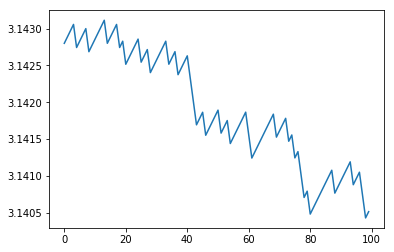

In [29]:
plt.plot(estimates);

In [56]:
def fib(max):
    a, b = 0, 1
    while a < max:
        yield a
        a, b = b, a + b
for i,r in enumerate(fib(100),start=1001):
    print(i,r)
        

    

1001 0
1002 1
1003 1
1004 2
1005 3
1006 5
1007 8
1008 13
1009 21
1010 34
1011 55
1012 89


In [58]:
#help(range)
print('range(5) = %s' % range(5))
for x in range(5):
    print(x)

range(5) = range(0, 5)
0
1
2
3
4


Counters should be the last choice for browsing indexed objects

Use it only if you really need numbers themselves and not the elements

If numbering is really needed, we typically need values along with the given index. In this case, use `enumerate`

In [59]:
for i, x in enumerate(('egg', 'bacon', 'sausage', 'spam')):
    print('{}. {}'.format(i, x))

0. egg
1. bacon
2. sausage
3. spam


# Useful functions and methods

## `zip`
`zip` is used to iterate over several iterables simultaneously. It pairs elements of n objects into n-tuples so that we don't need indexing.


In [60]:
# let's create some generators
l1 = range(1,9)
l2 = (2 ** n for n in l1)
# and interate over them simultaneously
for x, y in zip(l1, l2):
    print("2^%i = %i" % (x, y))

2^1 = 2
2^2 = 4
2^3 = 8
2^4 = 16
2^5 = 32
2^6 = 64
2^7 = 128
2^8 = 256


## `enumerate`
In case you need to know the numeric index of the element, it is better to use `enumerate`, which gradually returns (index, element) tuples.

In [ ]:
for i, n in enumerate(range(1,10)):
    print("index = %i, value = %i" % (i, n))

## `dict.items`
Some classes implement helper methods for iteration. Eg. `dict.items` returns (key, value) pairs.

In [61]:
# part of the ascii table
d = {i: chr(i) for i in range(40, 50)}
for k, v in d.items():
    print("{0} -> {1}".format(k, v))

48 -> 0
49 -> 1
40 -> (
41 -> )
42 -> *
43 -> +
44 -> ,
45 -> -
46 -> .
47 -> /


Why does the default dictionary iterator in Python iterate through dictionary keys instead of (key, value) tuples?

https://www.quora.com/Why-does-the-default-dictionary-iterator-in-Python-iterate-through-dictionary-keys-instead-of-key-value-tuples

I (Guido) find the correspondence between "for x in dict" and "if x in dict" too compelling to break

## `itertools` module
This module contains many interesting and useful features for creating iterators, often inpired by functional languages.

In [62]:
# list itertools functions
import itertools
sorted([f for f in dir(itertools) if not f.startswith("_")])

['accumulate',
 'chain',
 'combinations',
 'combinations_with_replacement',
 'compress',
 'count',
 'cycle',
 'dropwhile',
 'filterfalse',
 'groupby',
 'islice',
 'permutations',
 'product',
 'repeat',
 'starmap',
 'takewhile',
 'tee',
 'zip_longest']

## Cartesian products (itertools.product)

In [63]:
import itertools
for p in itertools.product([1, 2, 3], [4, 5]):
    print(p)

(1, 4)
(1, 5)
(2, 4)
(2, 5)
(3, 4)
(3, 5)


In [64]:
for p in itertools.product([0, 1], repeat=4):
    print(''.join(str(x) for x in p))

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


## Combinations and combinations with replacement (itertools.combinations and itertools.combinations_with_replacement)

In [65]:
for c in itertools.combinations([1, 2, 3, 4, 5], 3):
    print(''.join(str(x) for x in c))

123
124
125
134
135
145
234
235
245
345


## Permutations (itertools.permutations)

In [66]:
for p in itertools.permutations([1, 2, 3, 4]):
    print(''.join(str(x) for x in p))

1234
1243
1324
1342
1423
1432
2134
2143
2314
2341
2413
2431
3124
3142
3214
3241
3412
3421
4123
4132
4213
4231
4312
4321


## Chaining iterables (itertools.chain)

In [67]:
a = [1, 2, 3, 4]
for p in itertools.chain(itertools.combinations(a, 2), itertools.combinations(a, 3)):
    print(p)

(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)
(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


In [68]:
for subset in itertools.chain.from_iterable(itertools.combinations(a, n) for n in range(len(a) + 1)):
    print(subset)

()
(1,)
(2,)
(3,)
(4,)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)
(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)
(1, 2, 3, 4)


## Grouping rows by a given key (itertools.groupby)

In [69]:
from itertools import groupby

things = [("animal", "bear"), ("animal", "duck"), ("plant", "cactus"), ("vehicle", "speed boat"), ("vehicle", "school bus")]

for key, group in groupby(things, lambda x: x[0]):
    for thing in group:
        print("A %s is a %s." % (thing[1], key))
    print()

A bear is a animal.
A duck is a animal.

A cactus is a plant.

A speed boat is a vehicle.
A school bus is a vehicle.



# Generator Expressions

An even simpler syntax exists for creating generators: a "generator expression".

In [70]:
evens = (i*2 for i in range(5))

In [71]:
type(evens)

generator

Passing this into the ``list`` function is equivalent to a list comprehension:

In [72]:
# These are equivalent:
list(evens) == [i*2 for i in range(5)]

True

But the generator expression is a more general construct. It has the advantage that it is "lazy"

The values need not be generated in memory all at once

![gen_iter_relationships.png](gen_iter_relationships.png)

In [4]:
f = open('students.txt')
all_students = set()
for line in f:
    line = line.rstrip()
    all_students.add(line)
    print(line)

JmĂŠno a pĹĂ­jmenĂ­:
Jan Vlk
Petr Marek


In [11]:
# minitask 7.1
# f is a general iterator, for example a file
f = open('students.txt')
it = f
header = f
for line in it:
    line = line.rstrip
    print(line)
    


<built-in method rstrip of str object at 0x0000017F0045B960>
<built-in method rstrip of str object at 0x0000017F001738F0>
<built-in method rstrip of str object at 0x0000017F003C93B0>


## How to be more effective with functions

http://www.informit.com/articles/article.aspx?p=2314818

http://dailytechvideo.com/video-227-brett-slatkin-how-to-be-more-effective-with-functions/

In [ ]:
from pprint import pprint

def load_cities_list(path):
    result = []
    with open(path) as handle:
        for line in handle:
            city, count = line.split('\t')
            result.append((city, int(count)))
    return result


result = load_cities_list('population.tsv')
pprint(result)

In [113]:
def normalize(population):
    total = sum(x for _, x in population)
    for city, count in population:
        percent = 100 * count / total
        yield city, percent

data = load_cities_list('population.tsv')
result = normalize(data)
print(next(result))
print(next(result))

('Laval', 11.007915058073822)
('Gatineau', 7.274106413710845)


In [114]:
def normalize(population):
    total = sum(x for _, x in population)
    for city, count in population:
        percent = 100 * count / total
        yield city, percent

data = load_cities_generator('population.tsv')
result = normalize(data)
print(next(result))
print(next(result))

StopIteration: 

In [115]:
import logging

data = load_cities_generator('population.tsv')
result = normalize(data)

try:
    print(next(result))
    assert False
except StopIteration:
    logging.exception('Expected')

data = load_cities_generator('population.tsv')
result = normalize(data)
print(list(result))

ERROR:root:Expected
Traceback (most recent call last):
  File "<ipython-input-115-bfd2cbcbf530>", line 7, in <module>
    print(next(result))
StopIteration


[]


In [116]:
def normalize(population):
    total = sum(x for _, x in population)
    for city, count in population:
        percent = 100 * count / total
        yield city, percent

data = load_cities_generator('population.tsv')
result = normalize(data)
print(next(result))
print(next(result))

StopIteration: 

The cause of this behavior is that an iterator only produces its results a single time

If you iterate over an iterator or generator that has already raised a StopIteration exception, you wonât get any results the second time around

Whatâs confusing is that you also wonât get any errors when you iterate over an already-exhausted iterator

for loops, the list constructor, and many other functions throughout the Python standard library expect the StopIteration exception to be raised during normal operation

These functions canât tell the difference between an iterator that has no output and an iterator that had output and is now exhausted

In [117]:
data = load_cities_list('empty.tsv')
result = normalize(data)
print(next(result))
print(next(result))

StopIteration: 

In [118]:
import logging

data = load_cities_list('empty.tsv')
result = normalize(data)

try:
    print(next(result))
    assert False
except StopIteration:
    logging.exception('Expected')

data = load_cities_generator('empty.tsv')
result = normalize(data)
print(list(result))

ERROR:root:Expected
Traceback (most recent call last):
  File "<ipython-input-118-9bf26f17d9fa>", line 7, in <module>
    print(next(result))
StopIteration


[]


To solve this problem, you can explicitly exhaust an input iterator and keep a copy of its entire contents in a list. You can then iterate over the list version of the data as many times as you need to. Hereâs the same function as before, but it defensively copies the input iterator.

In [119]:
def normalize_copy(population):
    population_list = list(population)
    total = sum(x for _, x in population_list)
    for city, count in population_list:
        percent = 100 * count / total
        yield city, percent

data = load_cities_generator('population.tsv')
result = normalize_copy(data)
print(next(result))
print(next(result))

('Laval', 11.007915058073822)
('Gatineau', 7.274106413710845)


In [120]:
a = [1,2,3]
b = iter(a)
c = iter(b)
print(b)
print(c)
print(b is c)

True


In [121]:
a = [1,2,3]
b = iter(a)
c = iter(a)
print(b)
print(c)
print(b is c)

False


In [122]:
class LoadCities(object):

    def __init__(self, path):
        self.path = path

    def __iter__(self):
        with open(self.path) as handle:
            for line in handle:
                city, count = line.split('\t')
                yield city, int(count)


data = LoadCities('population.tsv')
result = normalize(data)
print(next(result))
print(next(result))

('Laval', 11.007915058073822)
('Gatineau', 7.274106413710845)


In [123]:
def normalize_explicit(population):
    total = sum(x for _, x in iter(population))
    for city, count in iter(population):
        percent = 100 * count / total
        yield city, percent

data = LoadCities('population.tsv')
result = normalize_explicit(data)
print('Explicit')
print(next(result))
print(next(result))

Explicit
('Laval', 11.007915058073822)
('Gatineau', 7.274106413710845)


In [ ]:
def normalize_defensive(population):
    if iter(population) is iter(population):
        raise TypeError('Must be a container')

    total = sum(x for _, x in population)
    for city, count in population:
        percent = 100 * count / total
        yield city, percent


data = load_cities_generator('population.tsv')
result = normalize_defensive(data)
print(list(result))

# Useful functions and methods

## `zip`
`zip` is used to iterate over several iterables simultaneously. It pairs elements of n objects into n-tuples so that we don't need indexing.


In [ ]:
# let's create some generators
l1 = range(1,9)
l2 = (2 ** n for n in l1)
# and interate over them simultaneously
for x, y in zip(l1, l2):
    print("2^%i = %i" % (x, y))

    list(zip(*[iter('abcde')]*2)])

In [124]:
list(zip(*[iter('abcde')]*2))

[('a', 'b'), ('c', 'd')]

In [125]:
li = [1,2,3]
next(li)

TypeError: 'list' object is not an iterator

In [126]:
li = iter([1,2,3])
next(li)

1

In [128]:
next(li)

3

In [129]:
iter([1,2,3])

In [130]:
[iter([1,2,3])]*2

[<list_iterator at 0x17bc0903ba8>, <list_iterator at 0x17bc0903ba8>]

In [131]:
for obj in [iter('abc')]*2:
    print(obj)

In [132]:
*[iter('abc')]*3

SyntaxError: can't use starred expression here (<ipython-input-132-8c2347a2b213>, line 1)

In [133]:
def popper(*args):
    for e in args:
        print(next(e))

popper(*[iter('abc')]*3)


a
b
c


In [134]:
s = [1,2,3,4,5,6,7,8]
chunk_size = 3
list(zip(*[iter(s)]*chunk_size))

[(1, 2, 3), (4, 5, 6)]

In [135]:
from itertools import zip_longest
def grouper(group_size, iterable, fillvalue=None):
    args = [iter(iterable)] * group_size
    return zip_longest(fillvalue=fillvalue, *args)
for item in grouper(3, 'ABCDEFG', 'x'):
    print(item)

('A', 'B', 'C')
('D', 'E', 'F')
('G', 'x', 'x')


## `enumerate`
In case you need to know the numeric index of the element, it is better to use `enumerate`, which gradually returns (index, element) tuples.

In [ ]:
for i, n in enumerate(range(1,10)):
    print("index = %i, value = %i" % (i, n))

There are lots of built-in methods that provide actions on lists as a whole:

In [ ]:
any([True, False, True])

In [ ]:
all([True, False, True])

In [ ]:
max([1, 2, 3])

In [ ]:
sum([1, 2, 3])

# Functional Concepts

If Guido van Rossum, the author of the programming language Python, had got his will, this part would be missing in the lecture

In his article from May 2005 "All Things Pythonic: The fate of reduce() in Python 3000" - http://www.artima.com/weblogs/viewpost.jsp?thread=98196, he gives his reasons for dropping lambda, map(), filter() and reduce()

He expected resistance from the Lisp and the Scheme "folks"

What he didn't anticipate was the rigidity of this opposition

He wrote hardly a year later: "After so many attempts to come up with an alternative for lambda, perhaps we should admit defeat. I've not had the time to follow the most recent rounds, but I propose that we keep lambda, so as to stop wasting everybody's talent and time on an impossible quest."


We can see the result: lambda, map() and filter() are still part of core Python. Only reduce() had to go; it moved into the module functools.

His reasoning for dropping them is like this:

* There is an equally powerful alternative to lambda, filter, map and reduce, i.e. list comprehension
* List comprehension is more evident and easier to understand
* Having both list comprehension and "Filter, map, reduce and lambda" is transgressing the Python motto "There should be one obvious way to solve a problem"

Some like it, others hate it and many are afraid of the lambda operator

The lambda operator or lambda function is a way to create small anonymous functions, i.e. functions without a name

These functions are throw-away functions, i.e. they are just needed where they have been created

It is used primarily to write very short functions that are a hassle to define in the normal way

A function like this:

In [ ]:
def sum_squares(a, b):
    return a**2 + b**2

sum_squares(2, 3)

In [ ]:
print((lambda a, b: a**2 + b**2)(2, 3))

Lambda is often used as an argument to other functions that expects a function object, such as sorted()'s 'key' argument

In [ ]:
sorted([[3, 4], [3, 5], [1, 2], [7, 3]], key=lambda x: x[1])

In [ ]:
from collections import defaultdict
ice_cream = defaultdict(lambda: 'Vanilla')
ice_cream['Sarah'] = 'Chunky Monkey'
print(ice_cream['Sarah'])
print(ice_cream['Joe'])

In [ ]:
from collections import defaultdict
numbp = defaultdict(lambda: 0)
numbp['Adam'] = 42
print(numbp['Adam'])
print(numbp['Eva'])

In [ ]:
from collections import defaultdict
numbp = defaultdict(int)
numbp['Adam'] = 42
print(numbp['Adam'])
print(numbp['Eva'])

The lambda form is often useful as a closure, such as illustrated in the following example:

In [ ]:
def attribution(name):
    return lambda x: x + ' -- ' + name

pp = attribution('John')
pp('Dinner is in the fridge')

The general syntax of a lambda function is quite simple:

    lambda argument_list: expression

The argument list consists of a comma separated list of arguments and the expression is an arithmetic expression using these arguments

You can assign the function to a variable to give it a name.


    map(function, iterable, ...)

Return an iterator that applies function to every item of iterable, yielding the results


If additional iterable arguments are passed, function must take that many arguments and is applied to the items from all iterables in parallel

With multiple iterables, the iterator stops when the shortest iterable is exhausted

map is syntactic sugar for a simple list comprehension that applies one function to every member of a list:

In [ ]:
[str(x) for x in range(10)]

In [ ]:
map(str, range(10))

So I can write:
    
    analysed_data = map(analyse, data)

![8-queens](8-queens.jpg)

In [ ]:
from itertools import permutations

n = width_of_chessboard = 8
sqs = list(range(n))

Qs = (Q for Q in permutations(sqs)
      if n == len({Q[i]+i for i in sqs})
           == len({Q[i]-i for i in sqs}))
for q in Qs:
    print(q)

In [ ]:
sqs = list(range(8))
sqs


![8-rooks](8-rooks.gif)

In [ ]:
from itertools import permutations
rooks = permutations(sqs)
next(rooks)

In [ ]:
next(rooks)

In [ ]:
next(rooks)

In [ ]:
list(rooks)[34567]

In [ ]:
next(rooks)

In [ ]:
rooks = permutations(sqs)
list(rooks)[40319]


In [ ]:
import math
math.factorial(8)

In [ ]:
diagonal = list(range(8))
{r-c for c,r in enumerate(diagonal)}

In [ ]:
{r+c for c,r in enumerate(diagonal)}

In [ ]:
other_diagonal = list(reversed(diagonal))
{r-c for c,r in enumerate(other_diagonal)}

In [ ]:
diagonal = list(range(8))
{diagonal[i]-i for i in diagonal}

In [ ]:
{diagonal[i]+i for i in diagonal}

In [ ]:
from itertools import permutations

n = width_of_chessboard = 8
sqs = list(range(n))

Qs = (Q for Q in permutations(sqs)
      if n == len({Q[i]+i for i in sqs}) == len({Q[i]-i for i in sqs}))

# Copying

In [ ]:
a = [1, 2, 3, 4]
b = a
b is a

In [ ]:
b = a[:]
b is a

In [ ]:
d = dict(a=1,b=2)
d

In [ ]:
c = d
c is d

In [ ]:
c = d.copy()
c
c is d

In [ ]:
import copy
class A:
    def __init__(self, hodnota=None):
        self.x = hodnota
    def __repr__(self):
        return('x=%s' % self.x)


In [ ]:
a = A(-99) 
a
b_assign = a
b_shallow = copy.copy(a)
b_deep = copy.deepcopy(a)
a.x = 9 				
print('a.x=%s, b_assign.x=%s, b_shallow.x=%s, b_deep.x=%s' % (a.x, b_assign.x, b_shallow.x, b_deep.x))

In [ ]:
a = A([-2,3]) 
a
b_assign = a
b_shallow = copy.copy(a)
b_deep = copy.deepcopy(a)
a.x[0] =  8
print('a.x=%s, b_assign.x=%s, b_shallow.x=%s, b_deep.x=%s' % (a.x, b_assign.x, b_shallow.x, b_deep.x))

In [ ]:
a = [4,3,5,['pokus',2], A(-9)]
a
b_assign = a
b_shallow = copy.copy(a)
b_deep = copy.deepcopy(a)
a[3] = 999; a[4].x = -6
print('a=%s, b_assign.x=%s, b_shallow.x=%s, b_deep.x=%s' % (a, b_assign, b_shallow, b_deep))

In [ ]:
a = [4,3,5,['pokus',2], A(-9)]
a
b_assign = a
b_shallow = copy.copy(a)
b_deep = copy.deepcopy(a)
a[3] = 999; a[4].x = -6
b_slice = a[0:5]
print('a=%s, b_assign.x=%s, b_shallow.x=%s, b_deep.x=%s, b_slice=%s' % (a, b_assign, b_shallow, b_deep, b_slice))

# Trees in Python

In [ ]:
class Tree:
    def __init__(self, cargo, left=None, right=None):
        self.cargo = cargo
        self.left = left
        self.right = right
    def __str__(self):
        return str(self.cargo)
    
left = Tree(2)
right = Tree(3)
tree1 = Tree(1, left, right)
tree2 = Tree(1, Tree(2), Tree(3))


### Traversing trees

In [ ]:
def total(tree):
    if tree == None: return 0
    return total(tree.left) + total(tree.right) + tree.cargo

tree = Tree('+', Tree(1), Tree('*', Tree(2), Tree(3)))

def print_tree(tree):
    if tree == None: return
    print(tree.cargo, print_tree(tree.left), print_tree(tree.right))

print_tree(tree)	# + 1 * 2 3


In [ ]:
def print_tree_postorder(tree):
    if tree == None: return
    print_tree_postorder(tree.left)
    print_tree_postorder(tree.right)
    print(tree.cargo)
        
print_tree_postorder(tree)

def print_tree_indented(tree, level=0):
    if tree == None: return
    print_tree_indented(tree.right, level+1)
    print('  ' * level + str(tree.cargo))
    print_tree_indented(tree.left, level+1)


In [ ]:
class TreeNode(list):
    def __init__(self, iterable=(), **attributes):
        self.attr = attributes
        list.__init__(self, iterable)
        
    def __repr__(self):
        return '%s(%s, %r)' % (type(self).__name__,list.__repr__(self), self.attr)


### Autovivification 

automatic creation of a reference to a name when referencing undefined value

In [ ]:
from collections import defaultdict
def tree(): return defaultdict(tree)


In [ ]:
# a tree as a dictionary
t1 = {40 : {30:{}, 50:{}}}
t2 = {40: {30:{20:{}}, 50:{60:{}, 70:{}}}}
t2

In [ ]:
# functions are first-class citizens
def sqr(x):
    return x*x
def cube(x):
    return x*x*x
a = {'hello':sqr, 'world':cube}
m = a['hello'](5)
n = a['world'](10)


In [ ]:
# defaultdict
from collections import defaultdict
a = defaultdict()
a['hello'] = 1
a['hello']

In [ ]:
a['world']

In [ ]:
def always_one():
    return 1

a = defaultdict(always_one)
a['hello'] = 10
a['world']

In [ ]:
from collections import defaultdict
def tree(): return defaultdict(tree)

a = tree()
# an instance of defaultdict, which has
# function tree() as the constructor of
# its value for non-existent keys
# (similarly to aways_one)


In [ ]:
a[50]
# key 50 is added to the dictionary, another
# instance of the defaultdict as its value

In [ ]:
a[50][40]
# a[50] is an instance defaultdict
# a[50][40] indexes this instance using key 40
# which does not exist
# the key is added to this instance
# and its value is set to the value returned
# when calling tree() - yet another instance
# of default dict

In [ ]:
a[50][60]
a[50][70]
a[50][40][20]
a[50][40][25]
a[50][40][25][23]
a

In [ ]:
users = tree()
users['harold']['username'] = 'hrldcpr'
users['handler']['username'] = 'matthandlersux'

import json
print(json.dumps(users))


In [ ]:
taxonomy = tree()
taxonomy['Animalia']['Chordata']['Mammalia']['Carnivora']['Felidae']['Felis']['cat']
taxonomy['Animalia']['Chordata']['Mammalia']['Carnivora']['Felidae']['Panthera']['lion']
taxonomy['Animalia']['Chordata']['Mammalia']['Carnivora']['Canidae']['Canis']['dog']
taxonomy['Animalia']['Chordata']['Mammalia']['Carnivora']['Canidae']['Canis']['coyote']
taxonomy['Plantae']['Solanales']['Solanaceae']['Solanum']['tomato']
taxonomy['Plantae']['Solanales']['Solanaceae']['Solanum']['potato']
taxonomy['Plantae']['Solanales']['Convolvulaceae']['Ipomoea']['sweet potato']

In [ ]:
def dicts(t): return {k: dicts(t[k]) for k in t}
import pprint
pprint.pprint(dicts(taxonomy))
 

In [ ]:
def add(t, keys):
    for key in keys:
        t = t[key]

add(taxonomy, 
        'Animalia,Chordata,Mammalia,Cetacea,Balaenopteridae,Balaenoptera,blue whale'.split(','))

pprint.pprint(dicts(taxonomy))


## Misc

### Finding Monday from a Date

If you have a date and want to normalize(say to previous or next Monday), you could do the following:

In [ ]:
import datetime
some_date = datetime.date.today()
previous_monday = some_date - datetime.timedelta(days=some_date.weekday())
print(previous_monday)
next_monday = some_date + datetime.timedelta(days=-some_date.weekday(), weeks=1)
print(next_monday)

## Strip various html tags

In [ ]:
from html.parser import HTMLParser

class HTMLStrip(HTMLParser):


    def __init__(self):
        self.reset()
        self.ls = []

    def handle_data(self, d):
        self.ls.append(d)

    def get_data(self):
        return ''.join(self.ls)

    @staticmethod
    def strip(snippet):
        html_strip = HTMLStrip()
        html_strip.feed(snippet)
        clean_text = html_strip.get_data()
        return clean_text

snippet = HTMLStrip.strip(html_snippet)


## Escape HTML

In [ ]:
import html
escaped_snippet = html.escape(html_snippet)
html_snippet = html.unescape(escaped_snippet)

In [ ]:
si = 'hello',

In [ ]:
print(si)

In [ ]:
empty = ()

In [ ]:
print(empty)

In [ ]:
a = set('abracadabra')

In [ ]:
a

In [ ]:
b = set('alacazam')
b

In [ ]:
a ^ b

In [ ]:
a = {x for x in 'abracadabra' if x not in 'abc'}

In [ ]:
a

## yield from

In [ ]:
def accumulate():
    tally = 0
    while 1:
        next = yield
        if next is None:
            return tally
        tally += next

def gather_tallies(tallies):
    while True:
        tally = yield from accumulate()
        tallies.append(tally)

In [ ]:
tallies = []
acc = gather_tallies(tallies)
next(acc) # Ensure the accumulator is ready to accept values
for i in range(4):
    acc.send(i)

In [ ]:
for i in range(5):
    acc.send(i)
    
acc.send(None) # Finish the second tally
tallies

In [ ]:
for i, v in enumerate(['tic', 'tac', 'toe']):
    print(i, v)


In [ ]:
from time import sleep
from tqdm import tqdm
for i in tqdm(range(1000)):
    sleep(0.01)